<a href="https://colab.research.google.com/github/ekdlakdl12/intelEn/blob/main/colab_tutorial_test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
3+6

9

In [ ]:
import tensorflow as tf

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import keras

In [ ]:
import boto3

ModuleNotFoundError: ignored

In [ ]:
!pip install boto3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 132 kB 33.3 MB/s 
     |████████████████████████████████| 9.1 MB 55.5 MB/s 
     |████████████████████████████████| 79 kB 9.8 MB/s 
     |████████████████████████████████| 140 kB 63.3 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.12 which is incompatible.
kapre 0.3.7 requires tensorflow>=2.0.0, but you have tensorflow 1.15.2 which is incompatible.


In [ ]:
import boto3

ImportError: ignored

In [ ]:
boto3.

SyntaxError: ignored

**파일 업로드 및 다운로드**

In [ ]:
# 파일 업로드 및 불러오기

import pandas as pd

df = pd.read_csv("/content/sample_data/california_housing_train.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


**GPU 연결 확인**

In [ ]:
import tensorflow as tf

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

# GPU 연결 하려면 Edit > Notebook settings

Found GPU at: /device:GPU:0


**CUP와 GPU 성능 비교**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


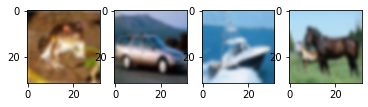

In [ ]:
# 이미지 데이터셋 확인

plt.subplot(141)
plt.imshow(X_train[0], interpolation="bicubic")
plt.grid(False)
plt.subplot(142)
plt.imshow(X_train[4], interpolation="bicubic")
plt.grid(False)
plt.subplot(143)
plt.imshow(X_train[8], interpolation="bicubic")
plt.grid(False)
plt.subplot(144)
plt.imshow(X_train[12], interpolation="bicubic")
plt.grid(False)
plt.show()

In [ ]:
# checking images shape
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
# scaling image values between 0-1
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
# one hot encoding labels
y_train_encoded = keras.utils.to_categorical(y_train, num_classes = 10, dtype = 'float32')
y_test_encoded = keras.utils.to_categorical(y_test, num_classes = 10, dtype = 'float32')

In [ ]:
# Model Building
def get_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
    ])
    model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model

In [ ]:
%%timeit -n1 -r1
# CPU 기반 학습 및 시간 확인
with tf.device('/CPU:0'):
    model_cpu = get_model()
    model_cpu.fit(X_train_scaled, y_train_encoded, epochs = 1)

1563/1563 [==============================] - 90s 57ms/step - loss: 1.8103 - accuracy: 0.3533
1min 30s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
%%timeit -n1 -r1
# GPU 기반 학습 및 시간 확인
with tf.device('/GPU:0'):
    model_gpu = get_model()
    model_gpu.fit(X_train_scaled, y_train_encoded, epochs = 1)

1563/1563 [==============================] - 8s 4ms/step - loss: 1.8108 - accuracy: 0.3574
9.51 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


https://github.com/c-karl/deeplearning/blob/master/src/CNN_Tensorflow.ipynb


https://colab.research.google.com/github/c-karl/deeplearning/blob/master/src/CNN_Tensorflow.ipynb

https://colab.research.google.com/github/c-karl/deeplearning/blob/master/src/CNN_Tensorflow_colab.ipynb

In [ ]:
# colab 연결 버튼 생성

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/minsuk-heo/deeplearning/blob/master/src/CNN_Tensorflow.ipynb)

# 탐색적 데이터 분석(EDA)
https://colab.research.google.com/github/c-karl/DA_DS_Book001/blob/main/10.1.2.탐색적%20데이터%20분석(EDA).ipynb

# 공분산과 상관성 분석

https://colab.research.google.com/github/c-karl/DA_DS_Book001/blob/main/10.2.3.공분산과%20상관성%20분석.ipynb

# 비교 시각화

https://colab.research.google.com/github/c-karl/DA_DS_Book001/blob/main/10.4.1.비교%20시각화.ipynb
